**Clustering using K-means algorithm using make_blob dataset of sklearn library**

In [1]:
import numpy as np
import pandas as pd

In [2]:
# load dataset
from sklearn.datasets import make_blobs

In [28]:
dataset = make_blobs()

In [29]:
df = pd.DataFrame(dataset[0],columns = ["X","Y"])
dftarget = pd.DataFrame(dataset[1],columns = ["target"])

In [30]:
df = pd.concat([df,dftarget],axis = 1)

In [31]:
df.describe()

,X,Y,target
count,100.000000,100.000000,100.000000
mean,-4.487169,-5.470905,0.990000
std,2.604475,2.670939,0.822598
min,-8.686821,-11.391920,0.000000
25%,-6.613270,-8.344024,0.000000
50%,-5.448042,-4.436632,1.000000
75%,-2.373844,-3.303059,2.000000
max,1.136542,-1.789217,2.000000


In [32]:
# scaling and preparation of dataset
from sklearn.preprocessing import MinMaxScaler

In [33]:
X = df.drop(["target"],axis = 1)
Y = df["target"]

In [34]:
X.shape

(100, 2)

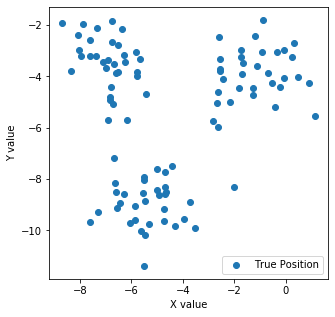

In [62]:
# visualize the data
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(5,5))
plt.scatter(X.values[:,0],X.values[:,1],label='True Position')
plt.xlabel("X value")
plt.ylabel("Y value")
plt.legend()
plt.show()

In [53]:
# applying model
from sklearn.cluster import KMeans

kmc = KMeans(n_clusters = 3)

In [54]:
kmc.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [55]:
# display the centroids
print("the centroids of the are :")
print(kmc.cluster_centers_)

the centroids of the are :
[[-5.32403978 -8.91343118]
 [-1.2247908  -3.92257804]
 [-6.88731567 -3.47238616]]


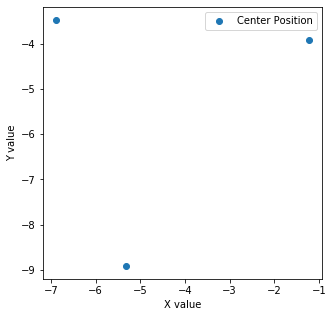

In [56]:
# visualize the centers
centrs = kmc.cluster_centers_

plt.figure(figsize=(5,5))
plt.scatter(centrs[:,0],centrs[:,1],label='Center Position')
plt.xlabel("X value")
plt.ylabel("Y value")
plt.legend()
plt.show()

In [57]:
predicted = kmc.labels_

In [58]:
out = pd.concat([Y,pd.DataFrame(predicted,columns=["predicted"])],axis=1)
out

,target,predicted
0,0,0
1,0,0
2,0,0
3,1,2
4,0,0
...,...,...
95,2,1
96,2,1
97,1,2
98,0,0


In [59]:
# checking the accuracy
from sklearn.metrics import accuracy_score
acc = accuracy_score(out.target,out.predicted)
print(f"the accuracy for the model is {acc}")

the accuracy for the model is 0.34


In [65]:
# Elbow method for the value of K in Kmeans
# Here we have to check for what value of K, the Squared sum error value is less for the model
sse = []
for k in range(1,10):
    kmc = KMeans(n_clusters=k)
    kmc.fit(X)
    sse.append(kmc.inertia_)


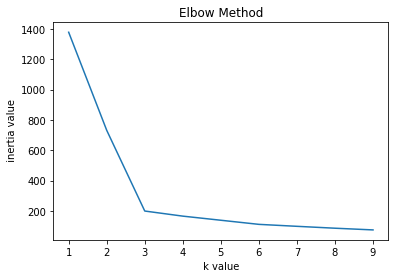

In [81]:
# visualize the elbow method plot
plt.title("Elbow Method")
plt.plot(np.arange(1,10),sse)
plt.xlabel(" k value ")
plt.ylabel(" inertia value")
plt.show()

In [82]:
# fromt he above process we can see the value of the K should be 3 for good clusters 